In [12]:
import pandas as pd
from MLsandbox import model_search_builder as msb
from scipy import stats
import math

%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Read in the data and collect features by their data types

The model_dict module has a **print_data_types** function that infers a data type for each feature and groups them for easy handling.  This is useful when doing operations that only apply to continuous features, or to categorical features.  To select only categorical features, you would use
        df[features_dict['object']]

In [2]:
df = pd.read_csv('../data/sample_data.csv', sep=',', header=0, index_col=0)

print "inferring feature types:"
features_dict = msb.infer_data_types(df)

print "\n Specifying ordinal features, which could not be inferred"
# note: specified the non-existent feature 'x' to illustrate output when a feature is not found or is misspelled
features_dict = msb.specify_ordinal(features_dict, ['target_variable', 'x'])

print "\n Specifying categorical features like site_id, which were inferred as discrete"
features_dict = msb.specify_categorical(features_dict, ['line_id', 'site_id', 'strategy_id'])

inferring feature types:


**discrete:** avg_imps_site, conversions, impressions, line_id, site_id, strategy_id, target_variable

**continuous:** adv_id, avg_bid, cvr, cvr_strat, goal, hist_zscore, limit, line_cvr, max_bid, overlap, price, stdev_imps_site, win_rate_site, win_rate_site_table, win_rate_strat, win_rate_strat_table

**categorical:** adv_vertical, list_type, name


 Specifying ordinal features, which could not be inferred
the following features were not found: 
['x']


**ordinal:** target_variable

**categorical:** adv_vertical, list_type, name

**continuous:** adv_id, avg_bid, cvr, cvr_strat, goal, hist_zscore, limit, line_cvr, max_bid, overlap, price, stdev_imps_site, win_rate_site, win_rate_site_table, win_rate_strat, win_rate_strat_table

**discrete:** avg_imps_site, conversions, impressions, line_id, site_id, strategy_id


 Specifying categorical features like site_id, which were inferred as discrete


**ordinal:** target_variable

**categorical:** adv_vertical, list_type, name, line_id, site_id, strategy_id

**continuous:** adv_id, avg_bid, cvr, cvr_strat, goal, hist_zscore, limit, line_cvr, max_bid, overlap, price, stdev_imps_site, win_rate_site, win_rate_site_table, win_rate_strat, win_rate_strat_table

**discrete:** avg_imps_site, conversions, impressions

## Test features for i.i.d. assumption

**1. How independent are the features?**

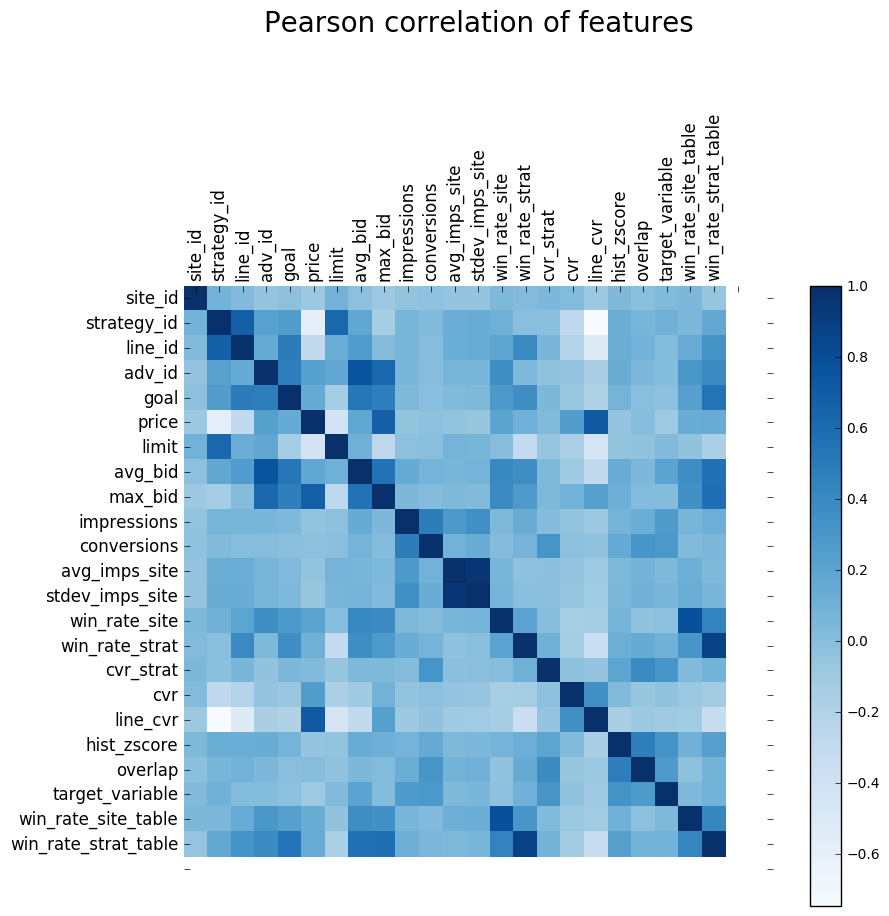

In [7]:
# Covariance Matrix
cov_mat = df.corr(method='pearson')

column_labels = cov_mat.columns
row_labels = cov_mat.columns

fig, ax = plt.subplots()
heatmap = ax.pcolor(cov_mat, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(9.5,8)

ax.set_frame_on(False)
ax.set_xticks(np.arange(len(df.columns)-2)+0.5, minor=False)
ax.set_yticks(np.arange(len(df.columns)-2)+0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False, fontsize=12, rotation=90)
ax.set_yticklabels(column_labels, minor=False, fontsize=12)
ax.set_title('Pearson correlation of features', fontsize=20, y=1.4)

fig.colorbar(heatmap,ax=ax)
plt.savefig('../figures/features_pearson_correlation.png')

#### 2. How well do the features follow a normal distribution?

Use a Quantile-Quantile (Q-Q) Plot to visualize how well each feature follows a normal distribution.  This will help you decide whether you can use a parametric machine learning algorithm. 

In [16]:
plt.figure(figsize=(75, 125))
plt.rc("lines", lw=10, marker='o')
for i, feature in enumerate(features_dict['continuous']):
    ax = plt.subplot(5, int(math.ceil(len(features_dict['continuous'])/5.0)), i+1)
    res = stats.probplot(df[feature].dropna(), dist='norm', plot=plt)
    ax.set_title(feature, fontsize = 60, fontweight='bold', y=.9)
    ax.set_xlabel('Quantiles', fontsize=60)
    ax.set_ylabel('Ordered Values', fontsize=60)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(45)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(45)

plt.tight_layout()
plt.savefig('../figures/q-q_plot_normality.png')
